### 독립표본 t test와 대응표본 t test
* 독립표본 t test
  - 서로 독립인 두 집단 비교
  - 예시: 수도권과 지방의 집 값
* 대응표본 t test
  - 동일 그룹에서 어떤 처리 후 전후 비교
  - 예시: 대출 규제 시작 전과 후의 집 값

### 순서
* if 표본의 크기가 10~30이면,
  - 정규성 검정
    * 정규성이라면, 등분산 검정
    * 정규성이 아니라면, 순위합 검정
* if 표본의 크기가 30 이상이면,
  - 등분산 검정
    * 등분산이라면, 등분산 가정 독립표본 t test
    * 아니라면, 이분산 가정 독립표본 t test

귀무가설: 수도권과 지방의 집값에 차이가 없다.

독립가설: 수도권과 지방의 집값에 차이가 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
house_a = np.random.normal(6, 5, 40) # 평균, 분산, 데이터 개수
house_b = np.random.normal(3, 5, 40)

In [3]:
# 수도권
house_a

array([ 9.36625808,  0.06114303, 10.96218074,  3.38292391,  1.12582483,
        2.71785028, -1.21328324, 11.51234198, -2.87934112, -1.76980272,
       10.9718621 ,  9.21828428, 10.8417977 , 10.47079883,  3.25810049,
        4.32931344,  3.31018038,  5.52532564,  9.62985914, 10.85293313,
        4.88053245, 11.01936337,  5.63558874, -3.22776637, -1.95916048,
       -0.58926074,  9.33196763, 10.56449017,  2.70521413,  0.6251861 ,
        2.6991477 ,  4.33133406,  6.10122595,  6.33598908,  7.09447722,
       -0.41375998,  4.64522154, -4.22413048, -1.9873154 ,  6.93839529])

In [4]:
# 지방
house_b

array([ 3.1646861 , -0.20683446,  7.28059359,  5.87950281,  2.18940936,
        4.49680956,  9.57726274,  3.81889301,  0.27138263, 11.31354362,
        4.90664084,  1.23693407,  0.37198221, -1.85419665, 16.05343588,
       -5.34386056,  3.57513459, 15.02595381,  8.78730296, -0.22952193,
        1.6131161 ,  8.89116091, -5.08049268, 10.81533574, -7.1183235 ,
       -1.93405808, -5.49377492, -6.69161383, 13.95791191,  1.82292098,
       10.0224037 ,  8.99296545,  2.28898418,  1.06595248,  4.9460382 ,
        0.78672433, -1.63202246,  1.81836633,  3.26408337, -3.86402971])

In [5]:
tmp1 = pd.concat([pd.DataFrame(['A']*40), pd.DataFrame(house_a.tolist())], axis=1)
tmp2 = pd.concat([pd.DataFrame(['B']*40), pd.DataFrame(house_b.tolist())], axis=1)

df = pd.concat([tmp1, tmp2], axis=0)

In [6]:
df.head(3)

,0,0
0,A,9.366258
1,A,0.061143
2,A,10.962181


In [7]:
df.tail(3)

,0,0
37,B,1.818366
38,B,3.264083
39,B,-3.864030


In [8]:
df.columns = ['grp', 'value']
df.head()

,grp,value
0,A,9.366258
1,A,0.061143
2,A,10.962181
3,A,3.382924
4,A,1.125825


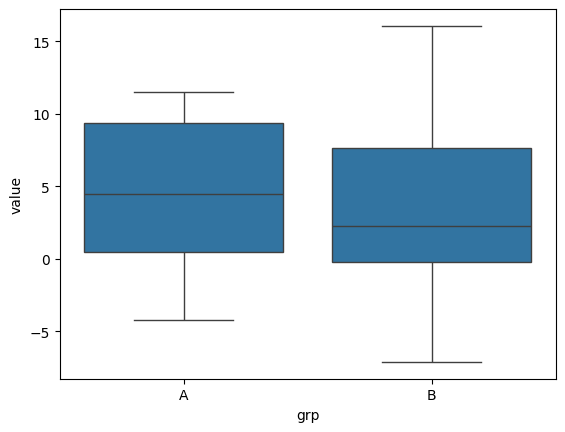

In [9]:
sns.boxplot(x='grp', y='value', data=df)
plt.show()

### 등분산 검정
* 귀무가설
  - 수도권(grp A), 지방(grp B) 집값의 분산이 같다.
  - p_value > 기각역(0.05): 귀무가설 채택
* 대립가설
  - 수도권(grp A), 지방(grp B) 집값의 분산이 다르다.
  - p_value > 기각역(0.05): 대립가설 기각

In [10]:
stats.levene(np.array(df[df['grp'] == 'A']['value']), np.array(df[df['grp'] == 'B']['value']))

LeveneResult(statistic=0.6871620491882445, pvalue=0.4096609075411902)

### 등분산 가정 독립표본 t test

In [11]:
stats.ttest_ind(np.array(df[df['grp'] == 'A']['value']),
                np.array(df[df['grp'] == 'B']['value']),
                equal_var = True) # 등분산이라는 뜻, default라서 안 써도 됨

TtestResult(statistic=1.1063527323067393, pvalue=0.27197442724529586, df=78.0)

p_value > 0.05이므로 귀무가설 채택, 대립가설 기각

t_value가 0에 가까울 수록 유의미한 차이가 없다